In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pr = pd.read_csv('sales.csv')

In [3]:
pr

,Unnamed: 0,Gender,Age,EstimatedSalary,Purchased,Unnamed: 5
0,NaN,15624510,Male,19,19000,0
1,NaN,15810944,Male,35,20000,0
2,NaN,15668575,Female,26,43000,0
3,NaN,15603246,Female,27,57000,0
4,NaN,15804002,Male,19,76000,0
...,...,...,...,...,...,...
395,NaN,15691863,Female,46,41000,1
396,NaN,15706071,Male,51,23000,1
397,NaN,15654296,Female,50,20000,1
398,NaN,15755018,Male,36,33000,0


In [4]:
pr.drop('Unnamed: 0',axis=1,inplace=True)
pr.drop('Gender',axis=1,inplace=True)

pr.columns = ['Gender','age','salary','Purchased']

In [5]:
pr.head()

,Gender,age,salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
x = pr.loc[:,['Gender','age','salary']].values

In [7]:
y = pr.Purchased.values

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
Lb_x = LabelEncoder()

In [10]:
x[:,0] = Lb_x.fit_transform(x[:,0])

In [11]:
x

array([[1, 19, 19000],
       [1, 35, 20000],
       [0, 26, 43000],
       ...,
       [0, 50, 20000],
       [1, 36, 33000],
       [0, 49, 36000]], dtype=object)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
model = LogisticRegression()

In [16]:
model.fit(x_train,y_train)

LogisticRegression()

In [17]:
y_predict = model.predict(x_test)

In [19]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [20]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y_test,y_predict)

0.275

In [23]:
from sklearn.metrics import r2_score , accuracy_score
from sklearn import metrics

In [24]:
accuracy_score(y_test,y_predict)

0.725

In [25]:
model.score(x_test,y_test)

0.725

In [493]:
pr.drop('nan',axis=1,inplace=True)

In [494]:
pr.head(3)

,user_ID,Gender,age,salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [495]:
# converting string into number
Gender =pd.get_dummies(pr['Gender'],drop_first=True)
Gender.head()

,Male
0,1
1,1
2,0
3,0
4,1


In [496]:
pr.head()

,user_ID,Gender,age,salary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [497]:
pr = pd.concat([pr,Gender],axis=1)
pr.drop('Gender',axis=1,inplace=True)

# pd.get_dummies(pr['Gender'],drop_first=True)
# pr.drop('Gender',axis=1,inplace=True)

pr.columns = ['user_ID','age','salary','Purchased','Gender']
pr.head()

,user_ID,age,salary,Purchased,Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [498]:
pr.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [499]:
pr.describe()

,user_ID,age,salary,Purchased,Gender
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500,0.490000
std,7.165832e+04,10.482877,34096.960282,0.479864,0.500526
min,1.556669e+07,18.000000,15000.000000,0.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000,1.000000


In [500]:
pr.isnull().sum()

user_ID      0
age          0
salary       0
Purchased    0
Gender       0
dtype: int64

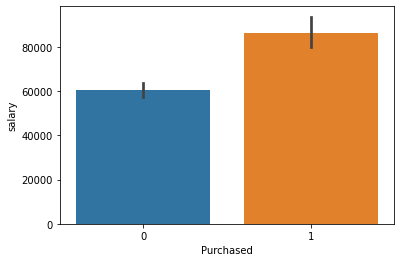

In [501]:
sns.barplot(x = 'Purchased',y = 'salary',data=pr)
plt.show()

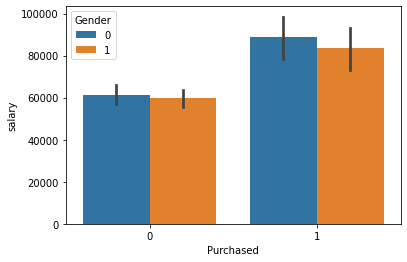

In [502]:
sns.barplot(x = 'Purchased',y = 'salary',data=pr,hue='Gender')
plt.show()

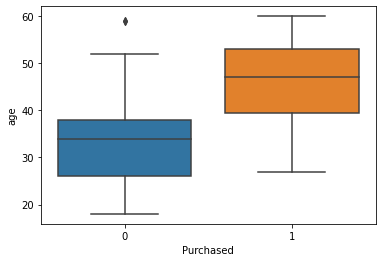

In [503]:
sns.boxplot(x = 'Purchased',y = 'age',data=pr)
plt.show()

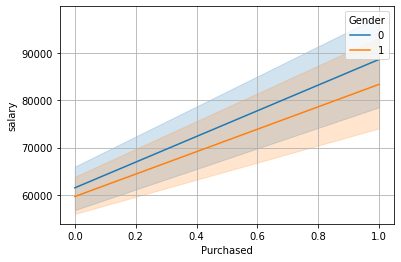

In [504]:
sns.lineplot(x = 'Purchased',y = 'salary',data=pr,hue='Gender')
plt.grid()
plt.show()

In [505]:
pr.head()

,user_ID,age,salary,Purchased,Gender
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1


In [506]:
# so we want to do domy incoding
from sklearn.preprocessing import OneHotEncoder

In [507]:
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(pr.Gender.values.reshape(-1,1)).toarray()

In [508]:
x = pr.loc[:,['Gender','age','salary']]

In [509]:
y = pr.Purchased

In [510]:
from sklearn.model_selection import train_test_split

In [511]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1)

In [512]:
x_test

,Gender,age,salary
398,1,36,33000
125,0,39,61000
328,1,36,118000
339,1,39,122000
172,0,26,118000
...,...,...,...
91,0,30,116000
322,1,41,52000
248,1,41,52000
186,0,20,82000


In [513]:
y_train

39     0
167    0
383    1
221    1
351    0
      ..
255    1
72     0
396    1
235    1
37     0
Name: Purchased, Length: 280, dtype: int64

In [514]:
from sklearn.linear_model import LogisticRegression

In [515]:
modal = LogisticRegression()

In [516]:
modal

LogisticRegression()

In [517]:
modal.fit(x_train,y_train)

LogisticRegression()

In [518]:
y_predict = modal.predict(x_test)

In [519]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [520]:
y_test

398    0
125    0
328    1
339    1
172    0
      ..
91     0
322    0
248    0
186    0
395    1
Name: Purchased, Length: 120, dtype: int64

In [1]:
from sklearn.metrics import accuracy_score